<a href="https://colab.research.google.com/github/kausar-vento/PCVK_Genap_2023/blob/main/Minggu%206/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

# Tugas Nomor 3

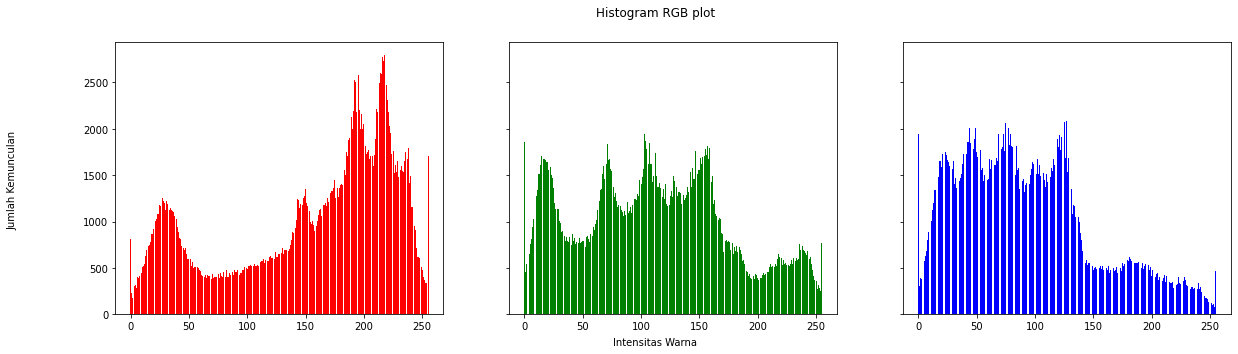

In [3]:
# Baca gambar
original = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

# Ambil tinggi, lebar, dan kedalaman gambar
height, width, depth = np.shape(original)

# Buat array kosong untuk menyimpan histogram warna
red = [0]*256
green = [0]*256
blue = [0]*256

# Hitung histogram
for y in range(0, height):
    for x in range(0, width):
        red[original[y][x][2]] += 1
        green[original[y][x][1]] += 1
        blue[original[y][x][0]] += 1

# Buat array untuk nilai-nilai intensitas warna
names = np.arange(256)

# Plot histogram
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')
plt.show()

# Tugas Nomor 4

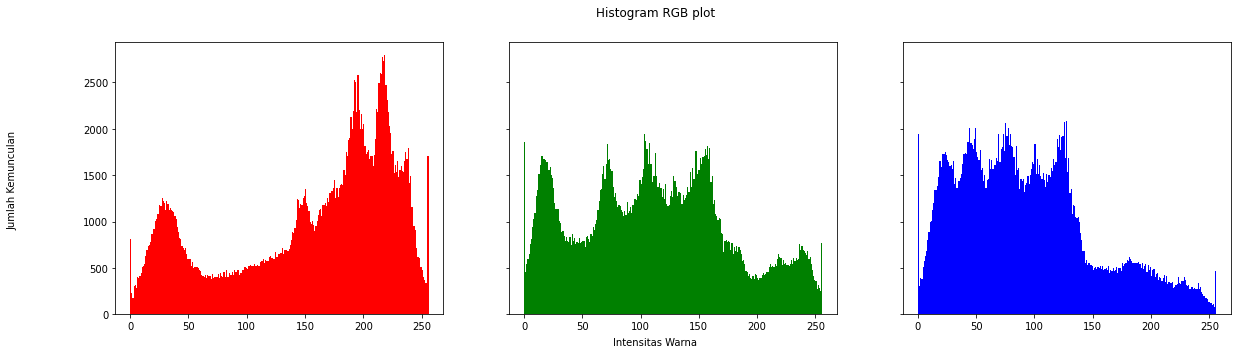

In [4]:
# Buat histogram menggunakan NumPy
hist, bins = np.histogram(original.ravel(),256,[0,256])

# Plot histogram
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].hist(original[:,:,2].ravel(),256,[0,256], color='red')
axs[1].hist(original[:,:,1].ravel(),256,[0,256], color='green')
axs[2].hist(original[:,:,0].ravel(),256,[0,256], color='blue')
plt.show()

# Output yang dihasilkan oleh kode di atas akan sama dengan output yang 
# dihasilkan oleh kode awal karena kedua kode tersebut menghitung histogram 
# citra yang sama. Namun, pada kode yang menggunakan NumPy, kita hanya 
# menggunakan satu baris kode untuk menghitung histogram, sehingga kode 
# tersebut lebih singkat dan mudah dibaca.

# Tugas Nomor 5

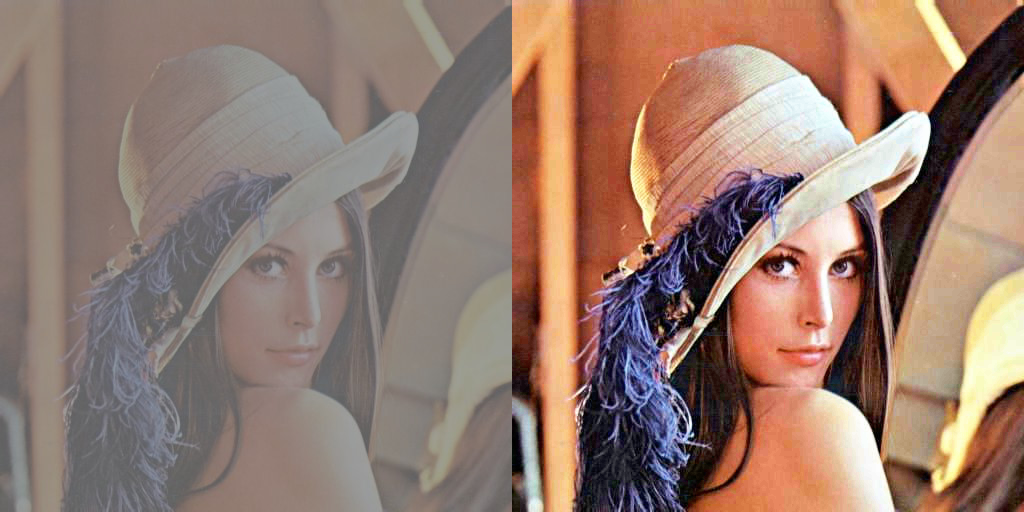

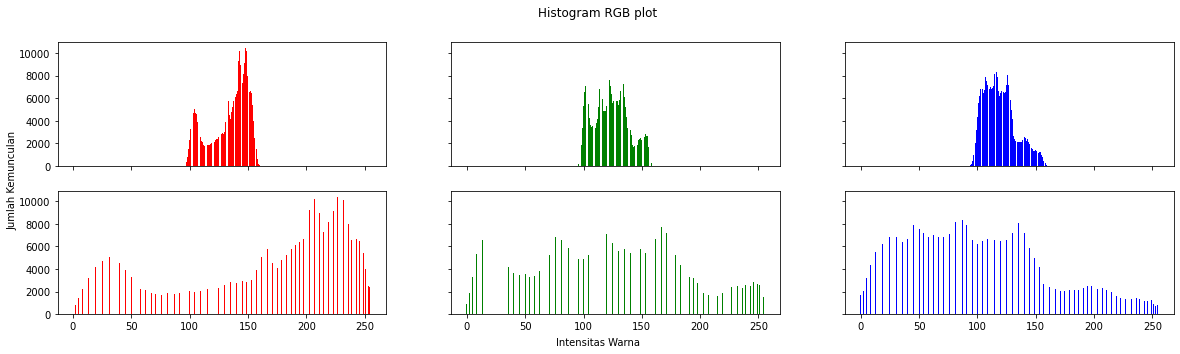

In [5]:
# Load image
original_5 = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')

# Membuat fungsi histogram yang berfungsi untuk menghitung nilai histogram pada setiap channel warna pada citra digital.
def histog(original_5):
  height, width, depth = np.shape(original_5) 
  ax = np.zeros((3,256)) 
  for y in range(0,height) : 
    for x in range(0,width) :
      ax[0][original_5[y][x][0]] += 1 
      ax[1][original_5[y][x][1]] += 1
      ax[2][original_5[y][x][2]] += 1 
  return ax

# Menghitung nilai histogram asli pada citra digital.
nilai_histo = histog(original_5)

# Mengubah citra digital menjadi sebuah array NumPy.
cvrt_array = np.asarray(original_5)

# Melakukan proses normalisasi histogram untuk menghasilkan histogram kumulatif yang ternormalisasi.
histogram_array = np.bincount(cvrt_array.flatten(), minlength=256) 
num_pixels = np. sum(histogram_array) 
histogram_array = histogram_array/num_pixels
chistogram_array = np.cumsum(histogram_array)

# Membuat tabel lookup untuk melakukan transformasi intensitas pada setiap piksel citra digital.
tabel_lookup = np.floor(255 * chistogram_array). astype (np.uint8)

#  Melakukan transformasi pada intensitas setiap piksel citra digital dengan menggunakan tabel lookup yang sudah dibuat.
img_list = list(cvrt_array.flatten()) 
eq_img_list = [tabel_lookup[p] for p in img_list] 
eq_cvrt_array = np.reshape(np.asarray(eq_img_list), cvrt_array.shape) 
orginal_5_result = eq_cvrt_array

#  Menghitung nilai histogram setelah dilakukan proses equalization pada citra digital.
equal_histo = histog(orginal_5_result)

#  Menggabungkan citra asli dan citra hasil equalization, lalu menampilkannya pada jendela gambar.
final_frame = cv.hconcat((original_5, orginal_5_result)) #concatenate image
cv2_imshow(final_frame)

# Buat array untuk nilai-nilai intensitas warna
names = np.arange (256) 

# Plot histogram
isgrayimg = np.array_equal(blue, green, red) 
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True) 
  fig.suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, nilai_histo[2], color='red') 
  axs[0,1].bar(names, nilai_histo[1], color='green') 
  axs[0,2].bar(names, nilai_histo[0], color='blue') 
  axs[1,0].bar(names, equal_histo[2], color='red') 
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue') 
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=Trbe, sharey=True) 
  fig. suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, nilai_histo[2], color='gray') 
  axs[0,1].bar(names, equal_histo[2], color='gray')

# Tugas Nomor 6

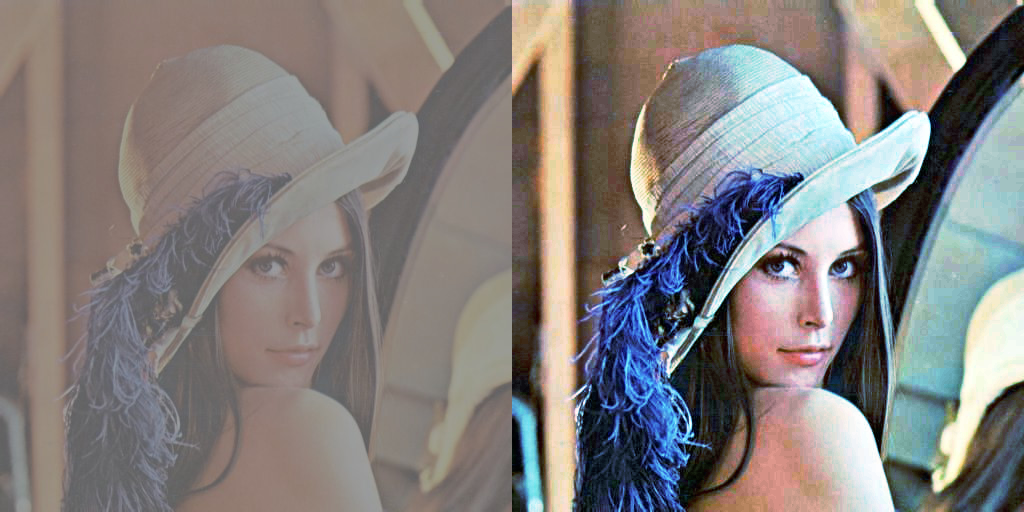

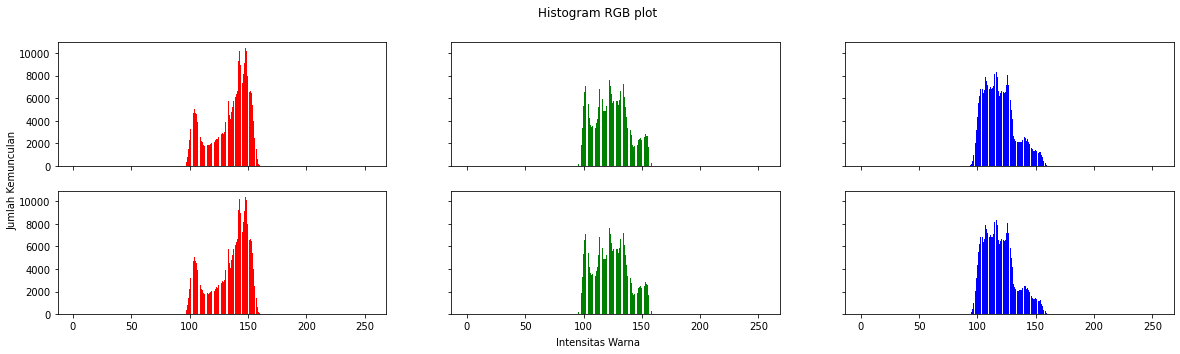

In [6]:
original_6 = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')
chanel = cv.split(original_6)
eq_chanel = []
for ch, color in zip(chanel, ["r", "g", "b"]):
  eq_chanel.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_chanel)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((original_6, eq_image))
cv2_imshow(final_frame)

names = np.arange(256)
isgraying = np.array_equal(blue, green, red)
if (isgraying == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, nilai_histo[2], color='red')
  axs[0,1].bar(names, nilai_histo[1], color='green')
  axs[0,2].bar(names, nilai_histo[0], color='blue')
  axs[1,0].bar(names, nilai_histo[2], color='red')
  axs[1,1].bar(names, nilai_histo[1], color='green')
  axs[1,2].bar(names, nilai_histo[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, nilai_histo[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

# Tugas Nomor 7

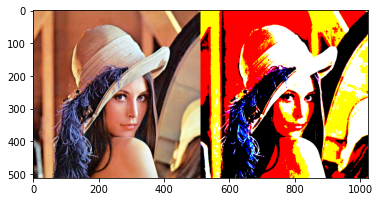

In [9]:
original_7 = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

def warna (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
ori = cv.cvtColor(original_7, cv.COLOR_BGR2RGB)
ori_2 = np.zeros(ori.shape, ori.dtype)

for y in range(0, ori.shape[0]):
  for x in range(0, ori.shape[1]):
    baru = warna(ori[y, x, 0], ori[y, x, 1], ori[y, x, 2])
    ori_2[y, x] = warnaPallette[baru]
    
final_frame = cv.hconcat((ori, ori_2))
plt.imshow(final_frame)

# Tugas Nomor 8

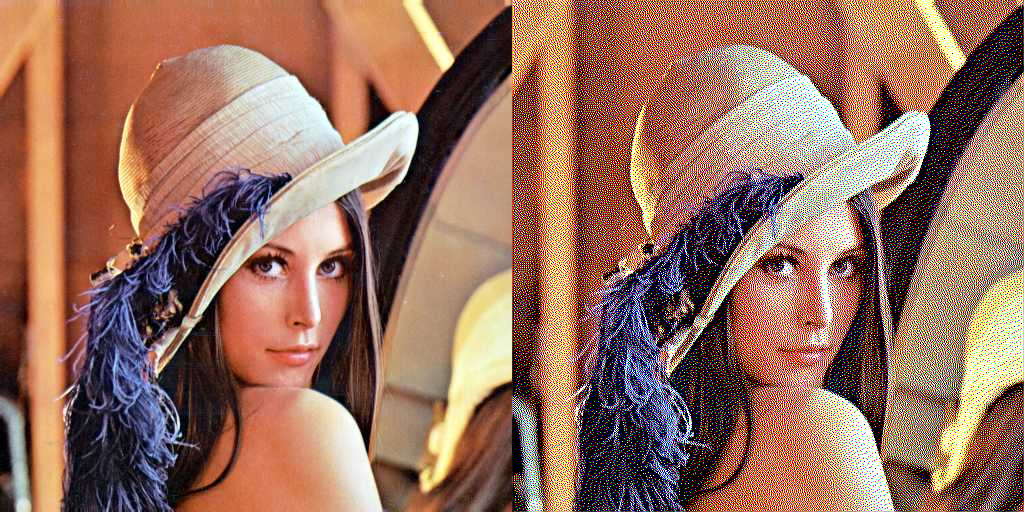

In [22]:
ori_image = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg') 
result_image = ori_image.copy()

def cariMinMax(v):
    if v > 255:
        v = 255
    if v < 0:
        v = 0
    return v

def prosesDithering(img, jarakPixel):
    tinggi = img.shape[0]
    lebar = img.shape[1]

    for y in range(0, tinggi-1):
        for x in range(1, lebar-1):
            old_b = img[y, x, 0]
            old_g = img[y, x, 1]
            old_r = img[y, x, 2]

            new_b = np.round(jarakPixel * old_b/255.0) * (255/jarakPixel)
            new_g = np.round(jarakPixel * old_g/255.0) * (255/jarakPixel)
            new_r = np.round(jarakPixel * old_r/255.0) * (255/jarakPixel)

            img[y, x, 0] = new_b
            img[y, x, 1] = new_g
            img[y, x, 2] = new_r
            quant_error_b = old_b - new_b
            quant_error_g = old_g - new_g
            quant_error_r = old_r - new_r

            img[y, x+1, 0] = cariMinMax(img[y, x+1, 0] + quant_error_b * 7 / 16.0)
            img[y, x+1, 1] = cariMinMax(img[y, x+1, 1] + quant_error_g * 7 / 16.0)
            img[y, x+1, 2] = cariMinMax(img[y, x+1, 2] + quant_error_r * 7 / 16.0)
            img[y+1, x-1, 0] = cariMinMax(img[y+1, x-1, 0] + quant_error_b * 3 / 16.0)
            img[y+1, x-1, 1] = cariMinMax(img[y+1, x-1, 1] + quant_error_g * 3 / 16.0)
            img[y+1, x-1, 2] = cariMinMax(img[y+1, x-1, 2] + quant_error_r * 3 / 16.0)
            img[y+1, x, 0] = cariMinMax(img[y+1, x, 0] + quant_error_b * 5 / 16.0)
            img[y+1, x, 1] = cariMinMax(img[y+1, x, 1] + quant_error_g * 5 / 16.0)
            img[y+1, x, 2] = cariMinMax(img[y+1, x, 2] + quant_error_r * 5 / 16.0)
            img[y+1, x+1, 0] = cariMinMax(img[y+1, x+1, 0] + quant_error_b * 1 / 16.0)
            img[y+1, x+1, 1] = cariMinMax(img[y+1, x+1, 1] + quant_error_g * 1 / 16.0)
            img[y+1, x+1, 2] = cariMinMax(img[y+1, x+1, 2] + quant_error_r * 1 / 16.0)

    return img

result_image = prosesDithering(result_image, 1)
final_frame_08 = cv.hconcat((ori_image, result_image))
cv2_imshow(final_frame_08)

# Tugas Nomor 9

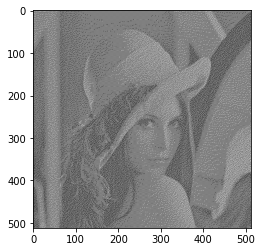

In [13]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')

# Ubah gambar menjadi grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Tentukan ukuran gambar
height, width = gray.shape[:2]

# Looping untuk setiap piksel pada gambar
for y in range(height):
    for x in range(width):
        
        # Ambil nilai piksel pada posisi (x, y)
        old_value = gray[y, x]

        # Hitung nilai piksel terdekat dari palet warna yang tersedia
        new_value = 0
        if old_value > 128:
            new_value = 255
        
        # Ubah nilai piksel pada posisi (x, y)
        gray[y, x] = new_value
        
        # Hitung selisih antara nilai piksel asli dan nilai terdekat
        error = old_value - new_value

        # Bagi selisih ini di antara piksel tetangga yang belum diproses
        if x < width - 1:
            gray[y, x+1] += error * 7 // 16
        
        if x > 0 and y < height - 1:
            gray[y+1, x-1] += error * 3 // 16
        
        if y < height - 1:
            gray[y+1, x] += error * 5 // 16
        
        if y < height - 1 and x < width - 1:
            gray[y+1, x+1] += error * 1 // 16

# Simpan gambar hasil dithering
cv.imwrite('/content/drive/MyDrive/PCVK/Images/lena_dithered.jpg', gray)

# Tampilkan gambar hasil dithering dengan menggunakan matplotlib
plt.imshow(gray, cmap='gray')
plt.show()